In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
data = pd.read_csv("HR Employee Attrition.csv")

In [6]:
data.shape 

(1470, 36)

In [7]:
data.head()

,ID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [29]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

- Imbalanced Data

# EDA

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


In [164]:
data.isna().sum()

ID                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [280]:
data1 = data.copy()

In [281]:
# Remove low variance and redundent variables
data1.drop(['ID','EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis = 1,inplace = True)

In [282]:
categorical_vars = data1.select_dtypes("O").columns.tolist()
categorical_vars

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [283]:
def attrition_percentage(var):
    df1 = data1.groupby([var]).size()
    df2 = data1[data1['Attrition'] == 'Yes'].groupby([var]).size()
    percentage_df = df2.divide(df1)*100
    percentage_df= percentage_df.fillna(0)
    # mean_percentage_df = pd.Series(percentage_df.mean(),index = percentage_df.index)
    mean_percentage_df = pd.Series(data1['Attrition'].value_counts(normalize = True)[1]*100,index = percentage_df.index)
    return percentage_df,mean_percentage_df

In [284]:
attrition_percentage('BusinessTravel')

(BusinessTravel
 Non-Travel            8.000000
 Travel_Frequently    24.909747
 Travel_Rarely        14.956855
 dtype: float64,
 BusinessTravel
 Non-Travel           16.122449
 Travel_Frequently    16.122449
 Travel_Rarely        16.122449
 dtype: float64)

### Univariate Analysis

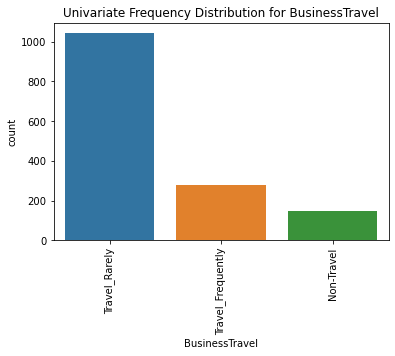

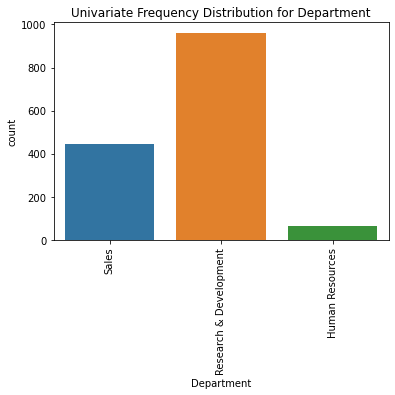

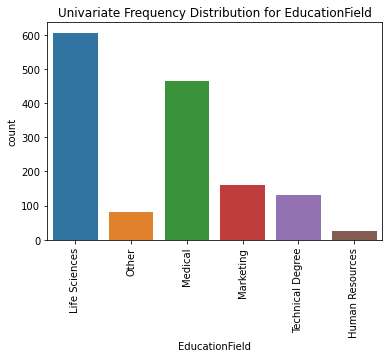

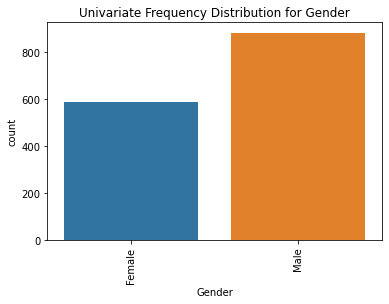

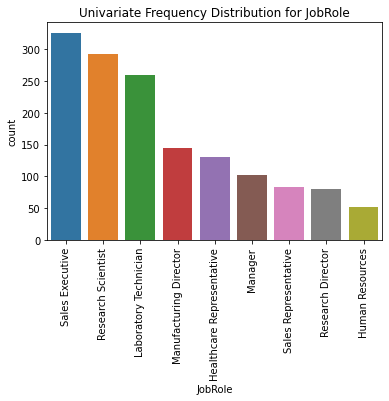

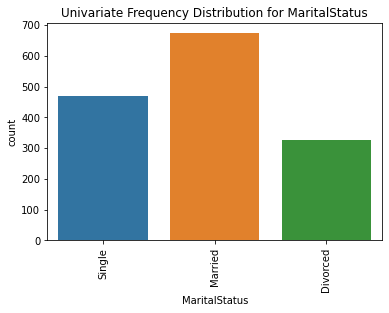

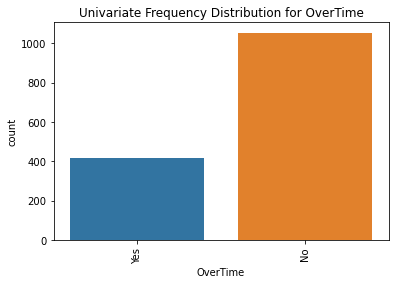

In [285]:
for var in categorical_vars:
    if var != "Attrition":
        fig = plt.figure(figsize = (6,4))
        sns.countplot(var,data = data1)
        plt.xticks(rotation=90)
        plt.title(f"Univariate Frequency Distribution for {var}")

### Bivariate analysis by Attrition

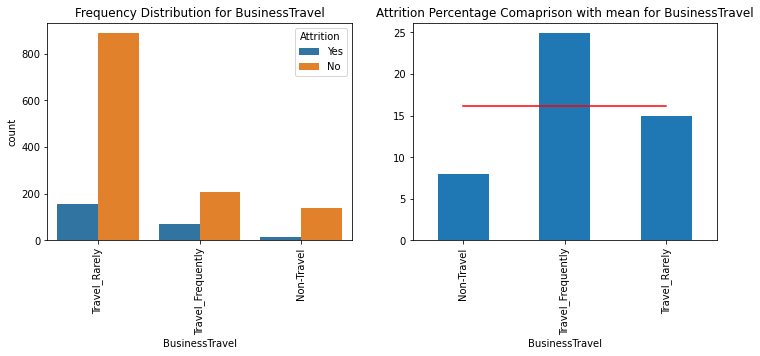

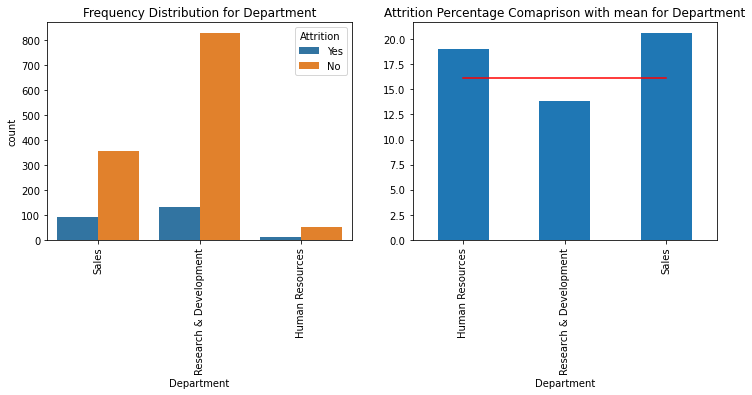

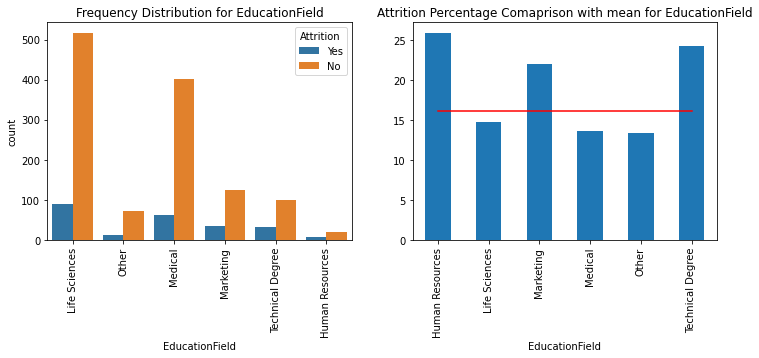

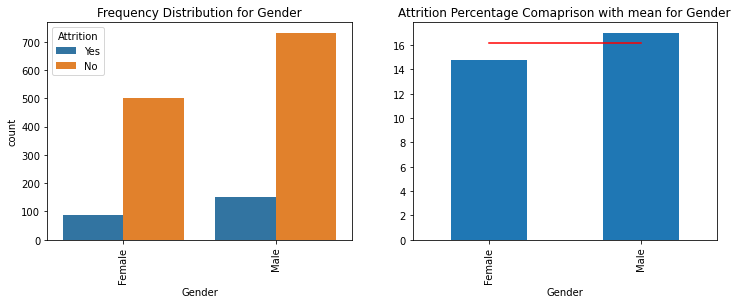

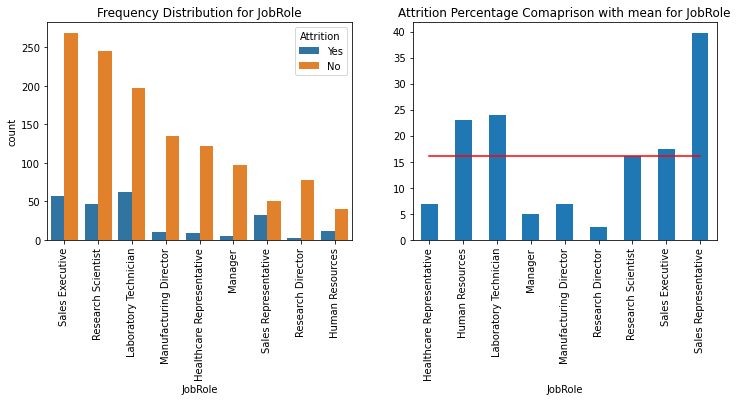

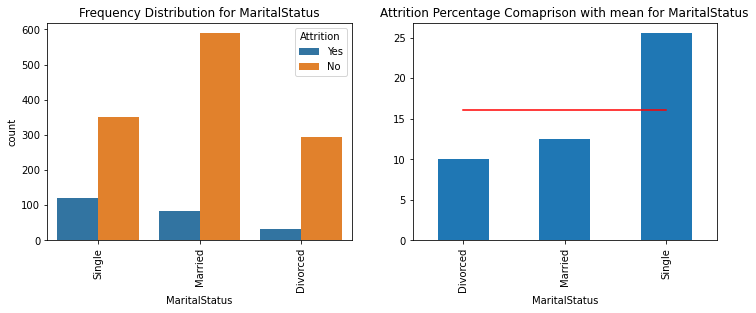

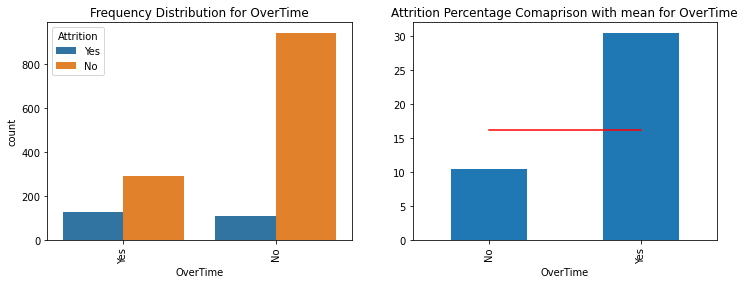

In [286]:
for var in categorical_vars:
    if var != "Attrition":
        fig = plt.figure(figsize = (12,4))
        ax = fig.add_subplot(1,2,1)
        sns.countplot(var,data = data1, hue = "Attrition",ax = ax)
        plt.xticks(rotation=90)
        plt.title(f"Frequency Distribution for {var}")
        ax = fig.add_subplot(1,2,2)
        attrition_percentage_data = attrition_percentage(var)
        attrition_percentage_data[0].plot(kind = 'bar')
        attrition_percentage_data[1].plot(color = ['red'])
        plt.xticks(rotation=90)
        plt.title(f"Attrition Percentage Comaprison with mean for {var}")
        plt.show()

Insights --
> Those who travel frequently has high chance for attrition (more than total attrition rate in data). It has a huge impact on attrition.

> Sales,HR have quite High percentages for attrition. We need to further investigate it.

> People from HR, Marketing, Technical education have high attrition rates.So it creates a great impact on attrition.

> Male has little high attrition rate. It is not creating that much impact on attrition.

> Sales Representative, HR, Lab technitians have high attrition percentages (more than total attrition rate in data). It impacts well on attrition.

> Single persons have high attrition rates. Marital Status is important variable.

> Those who are doing overtime having very high attrition rates.So this is also important.

In [287]:
numeric_vars = [var for var in data1.columns if var not in categorical_vars]
numeric_vars

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [288]:
for var in numeric_vars:
    print(f"No. of unique obs. in {var} --- {len(data1[var].unique())}")

No. of unique obs. in Age --- 43
No. of unique obs. in DailyRate --- 886
No. of unique obs. in DistanceFromHome --- 29
No. of unique obs. in Education --- 5
No. of unique obs. in EnvironmentSatisfaction --- 4
No. of unique obs. in HourlyRate --- 71
No. of unique obs. in JobInvolvement --- 4
No. of unique obs. in JobLevel --- 5
No. of unique obs. in JobSatisfaction --- 4
No. of unique obs. in MonthlyIncome --- 1349
No. of unique obs. in MonthlyRate --- 1427
No. of unique obs. in NumCompaniesWorked --- 10
No. of unique obs. in PercentSalaryHike --- 15
No. of unique obs. in PerformanceRating --- 2
No. of unique obs. in RelationshipSatisfaction --- 4
No. of unique obs. in StockOptionLevel --- 4
No. of unique obs. in TotalWorkingYears --- 40
No. of unique obs. in TrainingTimesLastYear --- 7
No. of unique obs. in WorkLifeBalance --- 4
No. of unique obs. in YearsAtCompany --- 37
No. of unique obs. in YearsInCurrentRole --- 19
No. of unique obs. in YearsSinceLastPromotion --- 16
No. of unique 

In [289]:
thresold = 15
discrete_vars = [var for var in numeric_vars if len(data1[var].unique())<=thresold]
continuous_vars = [var for var in numeric_vars if var not in discrete_vars]

## Discrete Variables Analysis

### Univariate Analysis

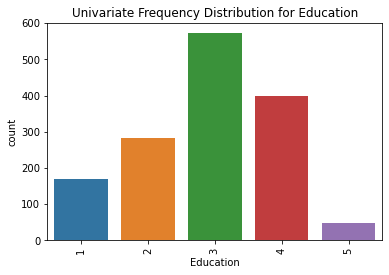

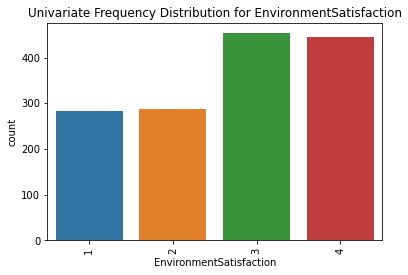

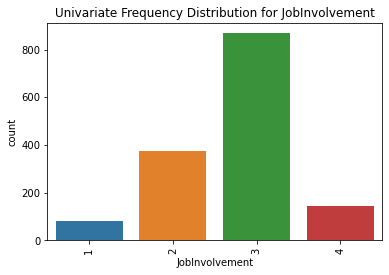

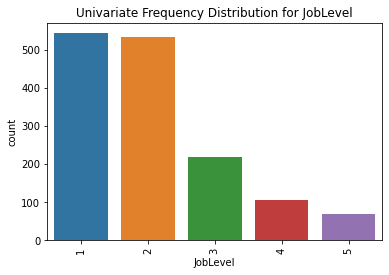

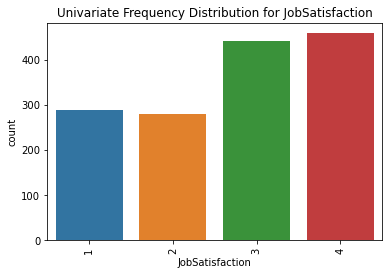

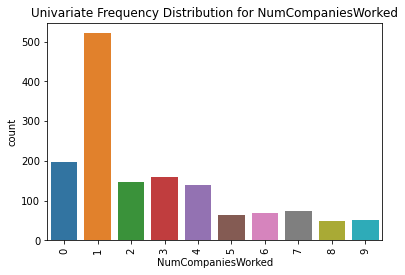

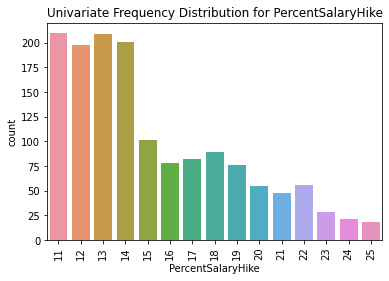

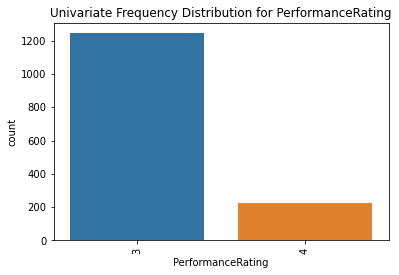

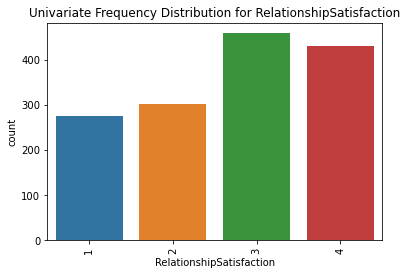

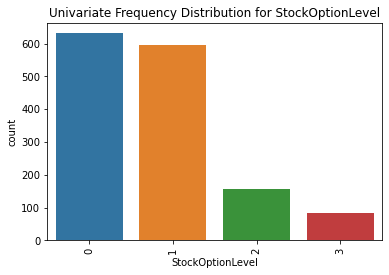

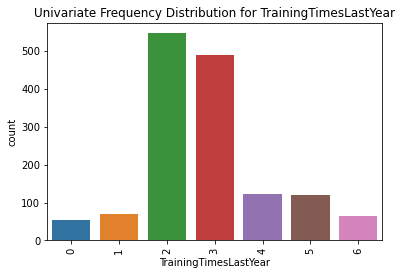

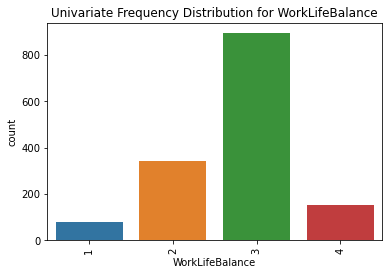

In [290]:
for var in discrete_vars:
    fig = plt.figure(figsize = (6,4))
    sns.countplot(var,data = data1)
    plt.xticks(rotation=90)
    plt.title(f"Univariate Frequency Distribution for {var}")

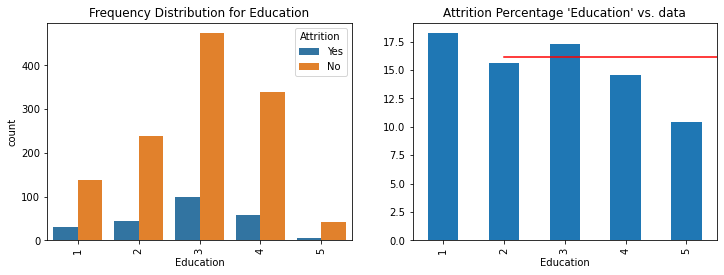

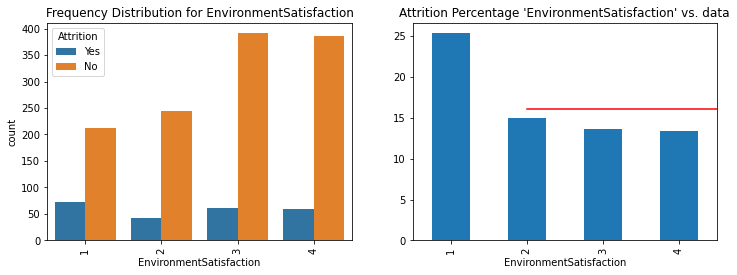

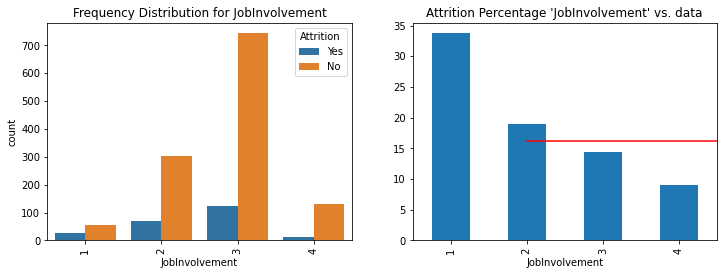

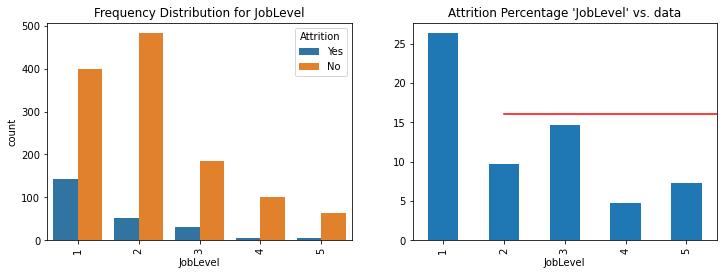

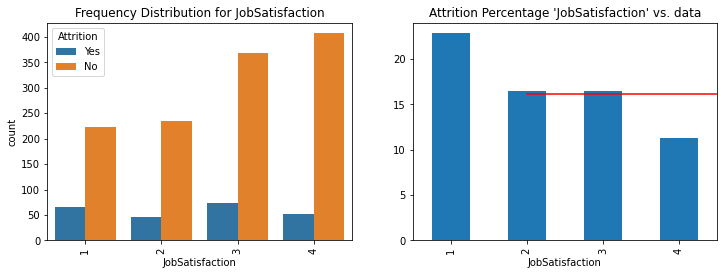

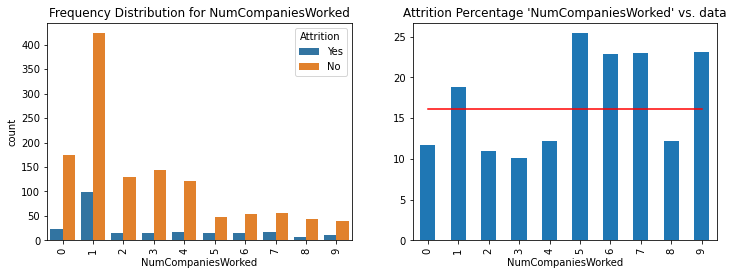

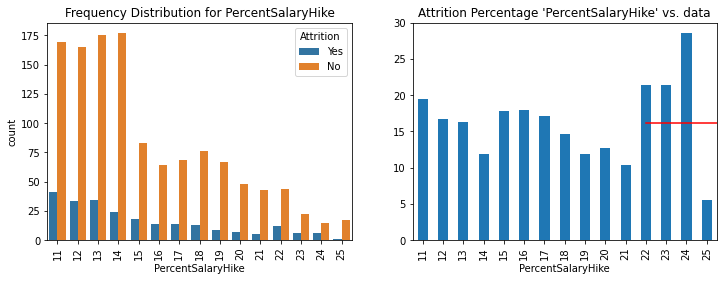

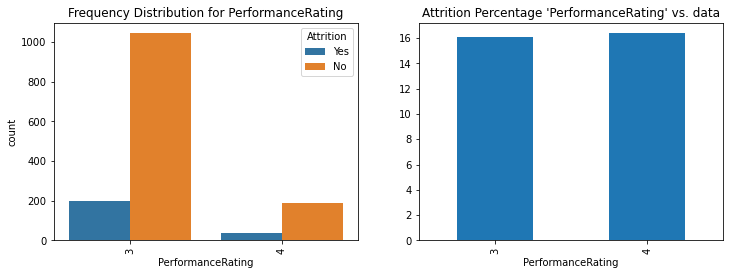

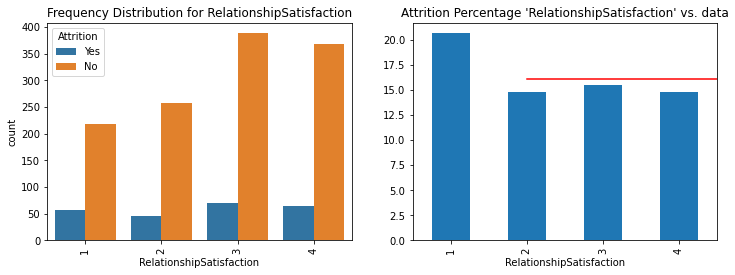

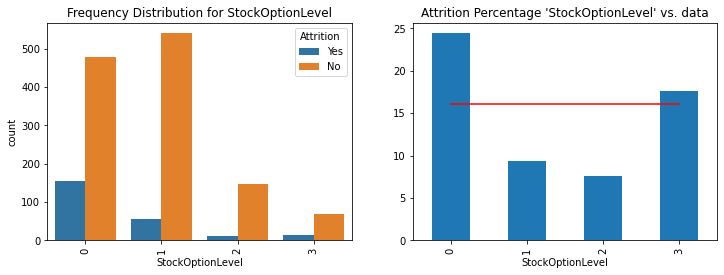

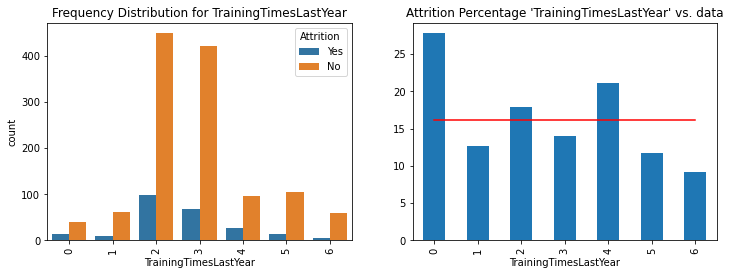

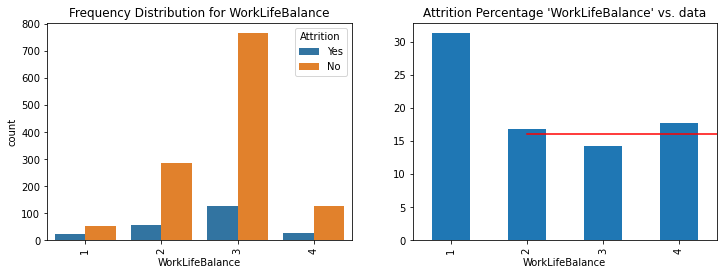

In [291]:
for var in discrete_vars:
    fig = plt.figure(figsize = (12,4))
    ax = fig.add_subplot(1,2,1)
    sns.countplot(var,data = data1, hue = "Attrition",ax = ax)
    plt.xticks(rotation=90)
    plt.title(f"Frequency Distribution for {var}")
    ax = fig.add_subplot(1,2,2)
    attrition_percentage_data = attrition_percentage(var)
    attrition_percentage_data[0].plot(kind = 'bar')
    attrition_percentage_data[1].plot(color = 'red')
    plt.xticks(rotation=90)     
    plt.title(f"Attrition Percentage '{var}' vs. data")
    plt.show()

Insights --
> People having low education having high chance of attrition. But this is not that impactful for attrition.

> environment satisfaction, job involvement, job staisfaction, relationship satisfaction are inversly proposonal to attrition rate. These are impactful features.

> People having job level = 1 having high chance of attrition.

> Those who are worked in 1 company previously have a quite high chance of attrition then who worked in more then 5 companies having a very high chance of attrition.

> There is decrese in attrition rate for salaryhike upto a certain percent(21%) then attrition rate increases.

> Those who didnot get training is most likely for attrition and also those who got a decent training( 2 and 4 hours) are a bit likely to attrition that may be for getting better opportunty after getting knowledge.

> Those who have low work life balance( = 1) are most likely to leave the company.

> People with stock level 1 and 3 have significantly high attrition rate compared to attrition rat4e in whole data.

## Continuous Variables Analysis

In [292]:
### Univariate Analysis

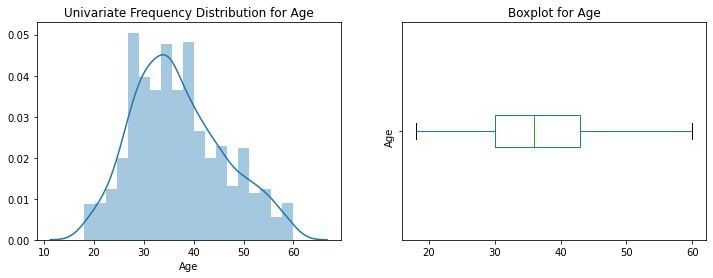

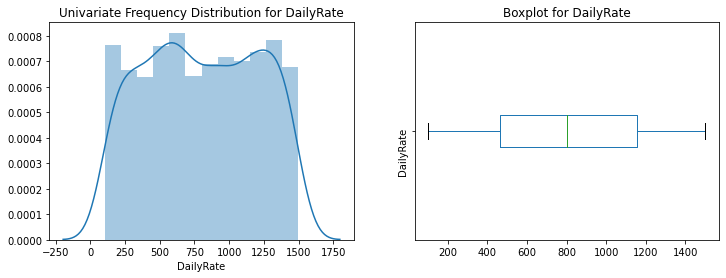

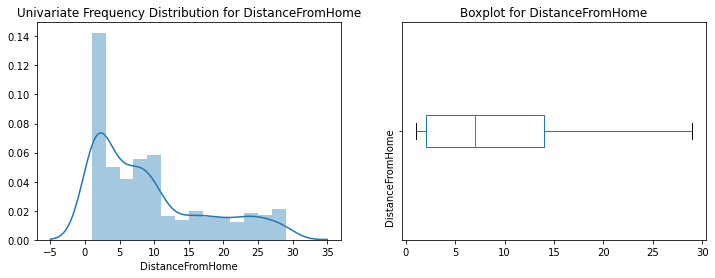

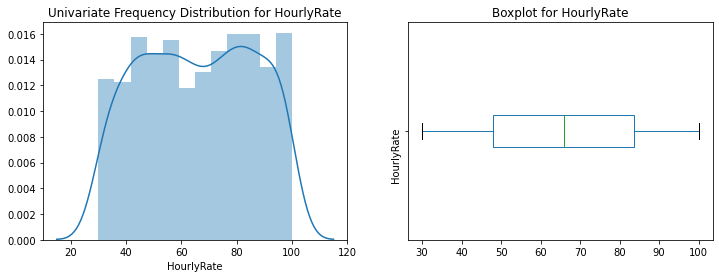

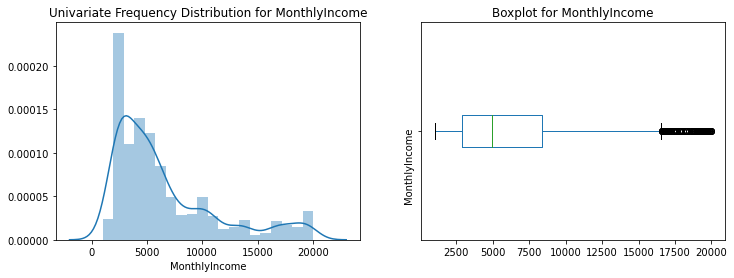

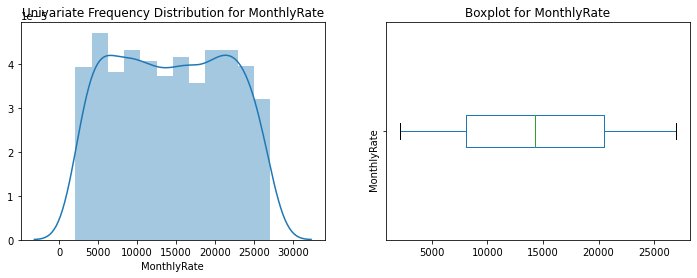

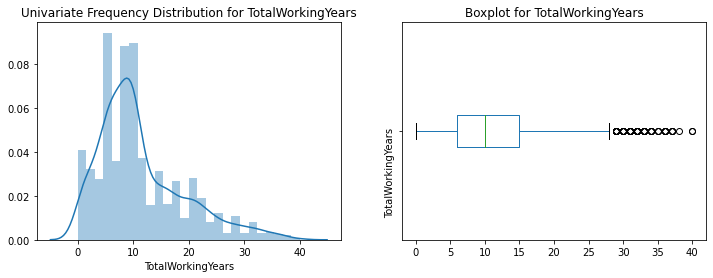

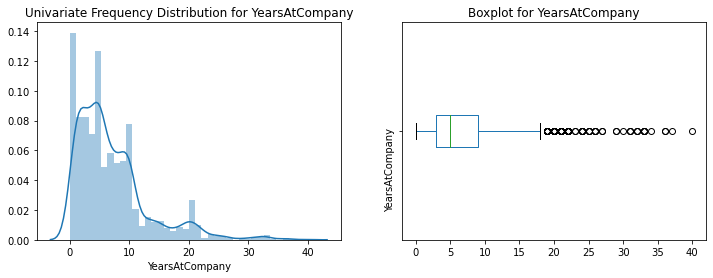

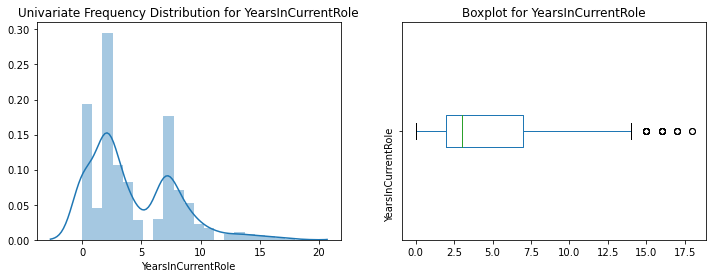

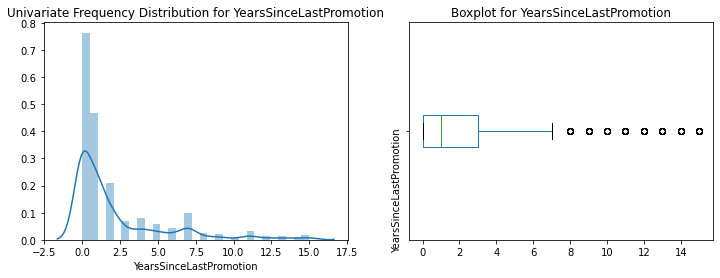

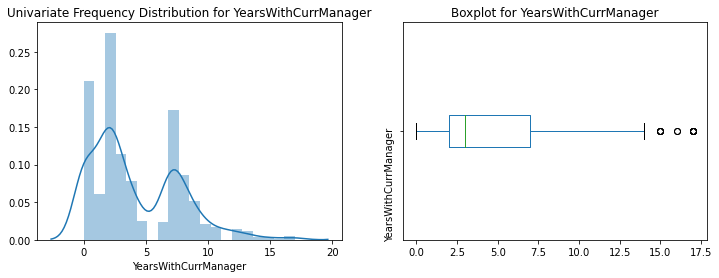

In [293]:
for var in continuous_vars:
    fig = plt.figure(figsize = (12,4))
    ax = fig.add_subplot(1,2,1)
    sns.distplot(data1[var],ax = ax)
    plt.title(f"Univariate Frequency Distribution for {var}")
    ax = fig.add_subplot(1,2,2)
    data1[var].plot(kind = 'box',vert = False)
    plt.yticks(rotation=90) 
    plt.title(f"Boxplot for {var}")
    plt.show()

- Age is normally distributed.
- Most of the variables are positively skewed.
- MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager have some outliers.

### Bivariate analysis for Attrition

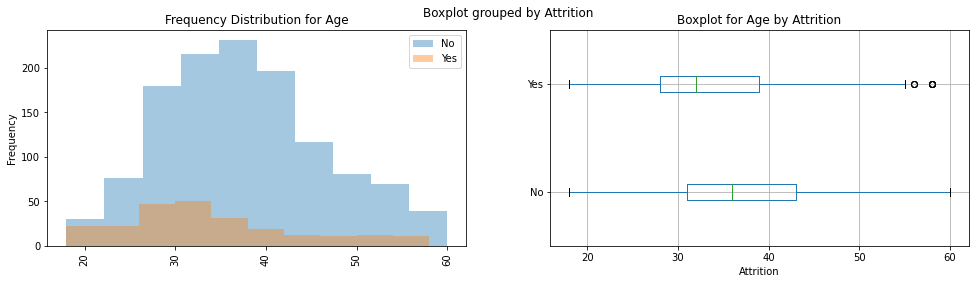

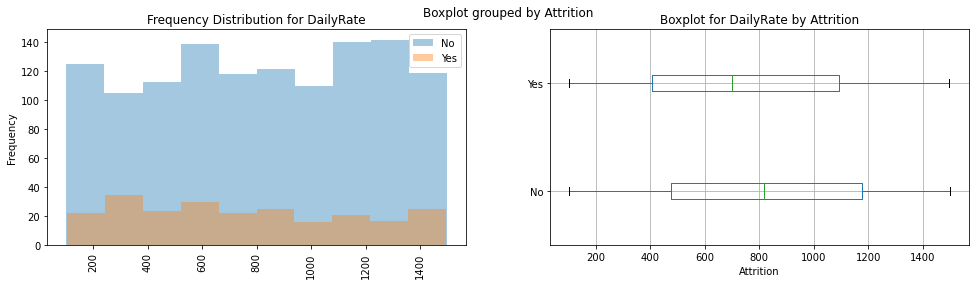

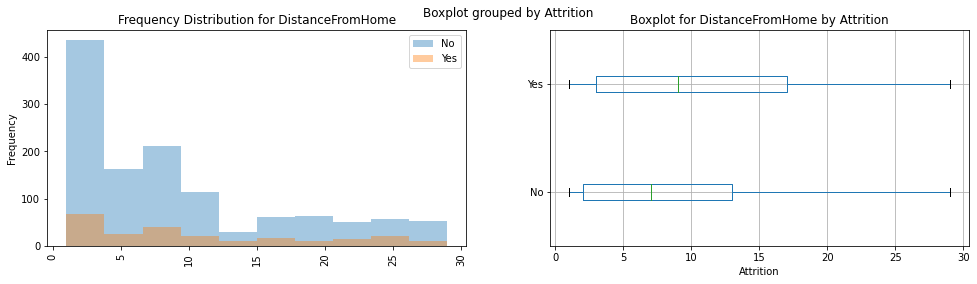

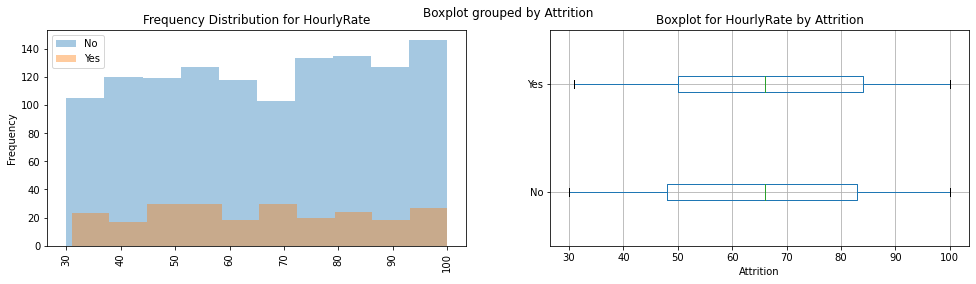

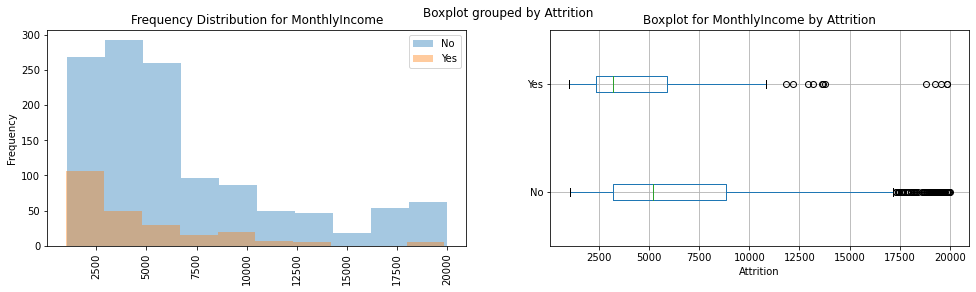

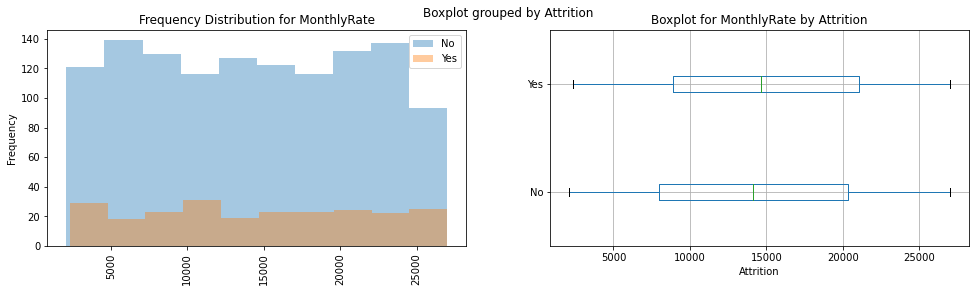

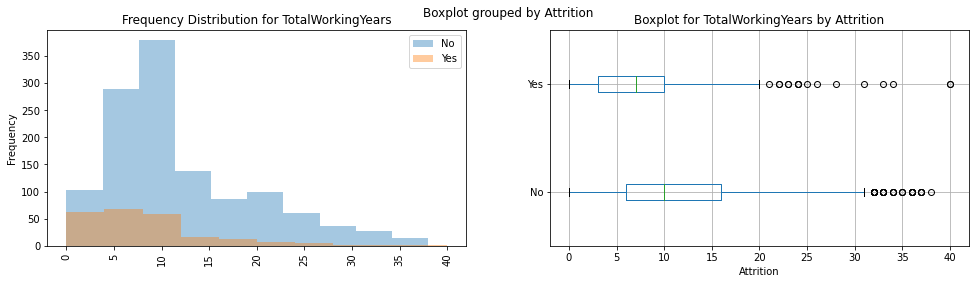

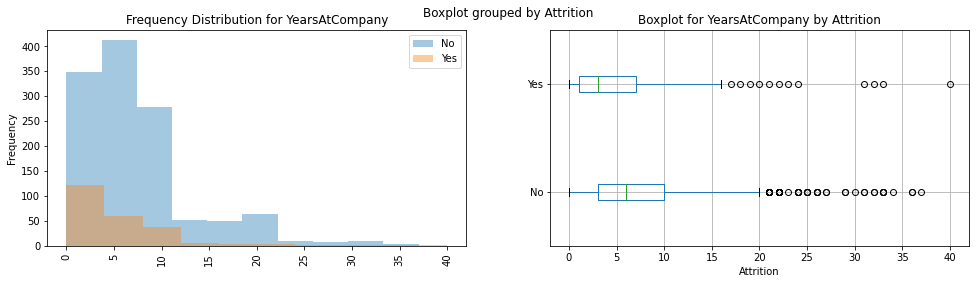

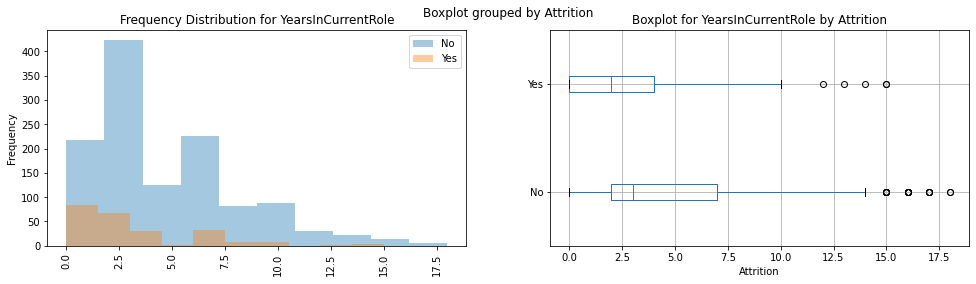

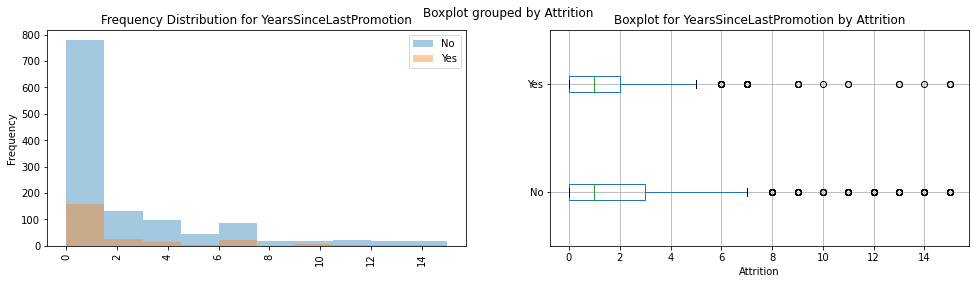

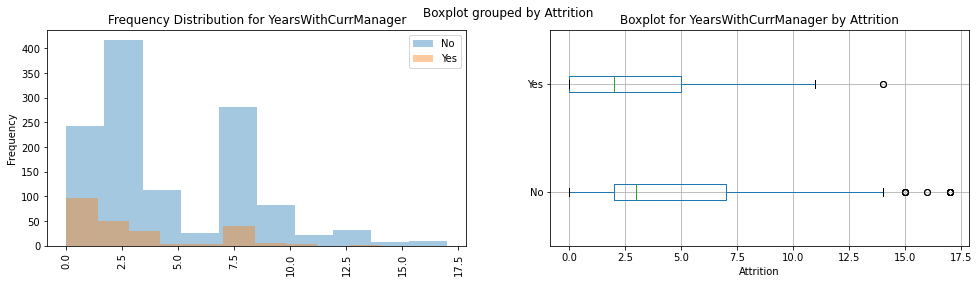

In [302]:
for var in continuous_vars:
    fig = plt.figure(figsize = (16,4))
    ax = fig.add_subplot(1,2,1)
    data1.groupby("Attrition")[var].plot(kind = 'hist',alpha=0.4,legend = True)
    plt.xticks(rotation=90)
    plt.title(f"Frequency Distribution for {var}")
    ax = fig.add_subplot(1,2,2)
    data1.boxplot(column = var, by = 'Attrition', vert= False,ax =ax)
    plt.title(f"Boxplot for {var} by Attrition")
    plt.show()

Insights --

> Young people(75% attrition upto 37 years) are more prone to attrition. So Age is important.

> 75% of attrition comes for income less than 6000. So income is an important variable.

> Those who have low working years means those who have low experience are more prone to change jobs. 50% of attrition comes prom people who have less than 6 working years.

> 50 % of attrition comes from those who are at that company for less than 3 years.

> 75 percent of the who have left where working for less than or euqal to 4 years in their current role.Attrition is higher among employees who have worked less is a specific role and also 25% left without spending any time in the role. HR needs to find the reason behind this.

> Those who did not get promotion for 2 years have 75% chance to leave the company. 25% of employees did not wait for 1 year also. This is also a big question.

> Same case happens for years working with same manager. If someone is working with same manager upto 5 years has 75% chance to leave the company. But the alaming case here also is 25% of employee did not spend a single year with same manager.

In [317]:
def histogram_attrition_percentage(var,bins_number):
    df1 = data1[data1['Attrition'] == 'Yes'][var]
    df2 = data1[data1['Attrition'] == 'No'][var]
    min_ = min(min(df1),min(df2))
    max_ = max(max(df1),max(df2))
    bins,step = np.linspace(min_,max_,bins_number+1,retstep = True)
    hist1,_ = np.histogram(df1,bins = bins)
    hist2,_ = np.histogram(df2,bins = bins)
    prop1 = 100 * hist1/(hist1+hist2)
    prop2 = 100 * hist2/(hist1+hist2)
    fig = plt.figure(figsize = (8,4))
    plt.bar(x = bins[:-1], height = prop1,bottom = 0,width = step,alpha = .2)
    plt.bar(x = bins[:-1], height = prop2,bottom = 0,width = step,alpha = .2)
    plt.title(f"Attrition percentage distribution for {var}")
    return bins

array([18., 25., 32., 39., 46., 53., 60.])

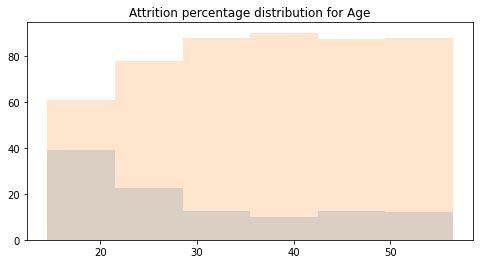

In [318]:
histogram_attrition_percentage('Age',6)

- Here we can clearly see that with increasing age attrition rate will be lower. From 18 to 25 there is high attrition rate.

array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ])

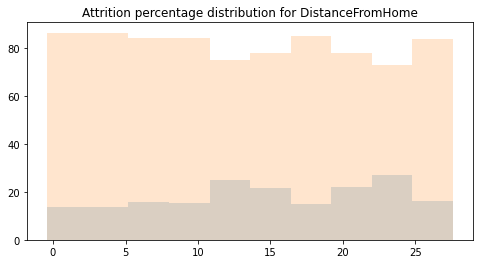

In [320]:
histogram_attrition_percentage('DistanceFromHome',10)

- No such impact on attrition.

array([ 1009.,  4174.,  7339., 10504., 13669., 16834., 19999.])

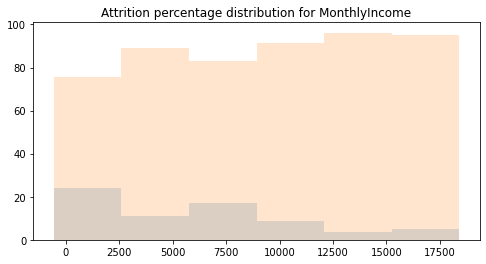

In [325]:
histogram_attrition_percentage('MonthlyIncome',6)

- Decresing Attrition rate with monthlyincome.

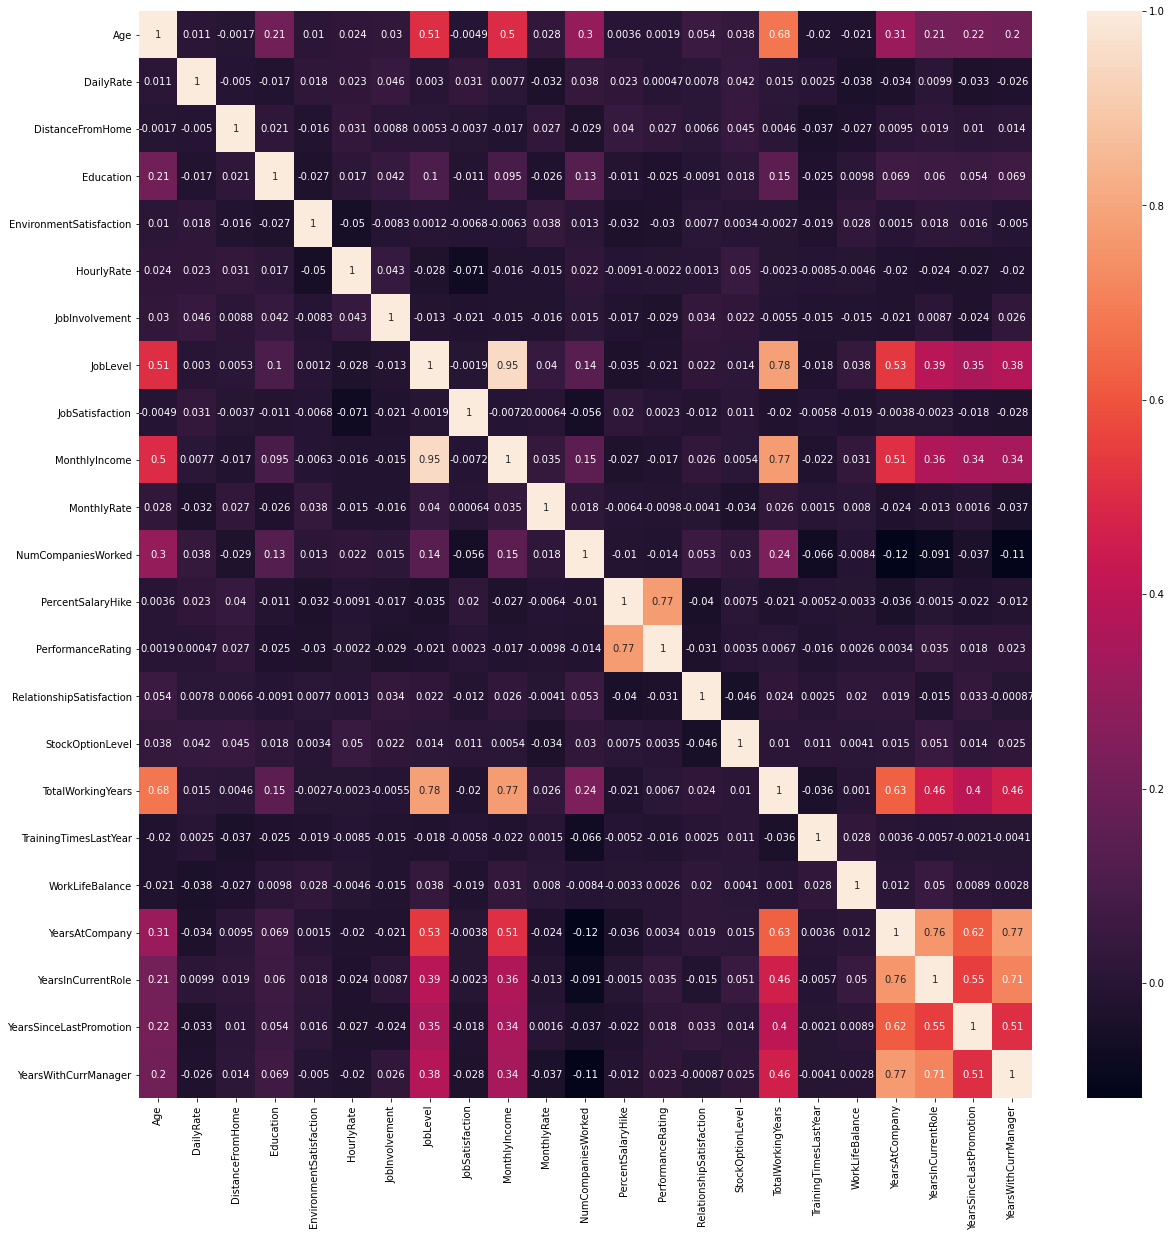

In [355]:
## Correlation plot
cor = data1.corr()
fig = plt.figure(figsize = (20,20))
sns.heatmap(cor,annot = True)

- MonthlyIncome and JobLevel are highly correlated.

Since some numeric variables are ordinal in nature so we are also give a try to Spearman's Rank correlation.

In [361]:
from scipy.stats import spearmanr
# now we craete one matrix of spearman's correlations
rows = []
for var1 in numeric_vars:
    cols = []
    for var2 in numeric_vars:
        spe_rho,p_value = spearmanr(data1[var1],data1[var2])
        cols.append(spe_rho)
    rows.append(cols)
    
spearman_association_table = pd.DataFrame(np.array(rows), columns= numeric_vars, index= numeric_vars)

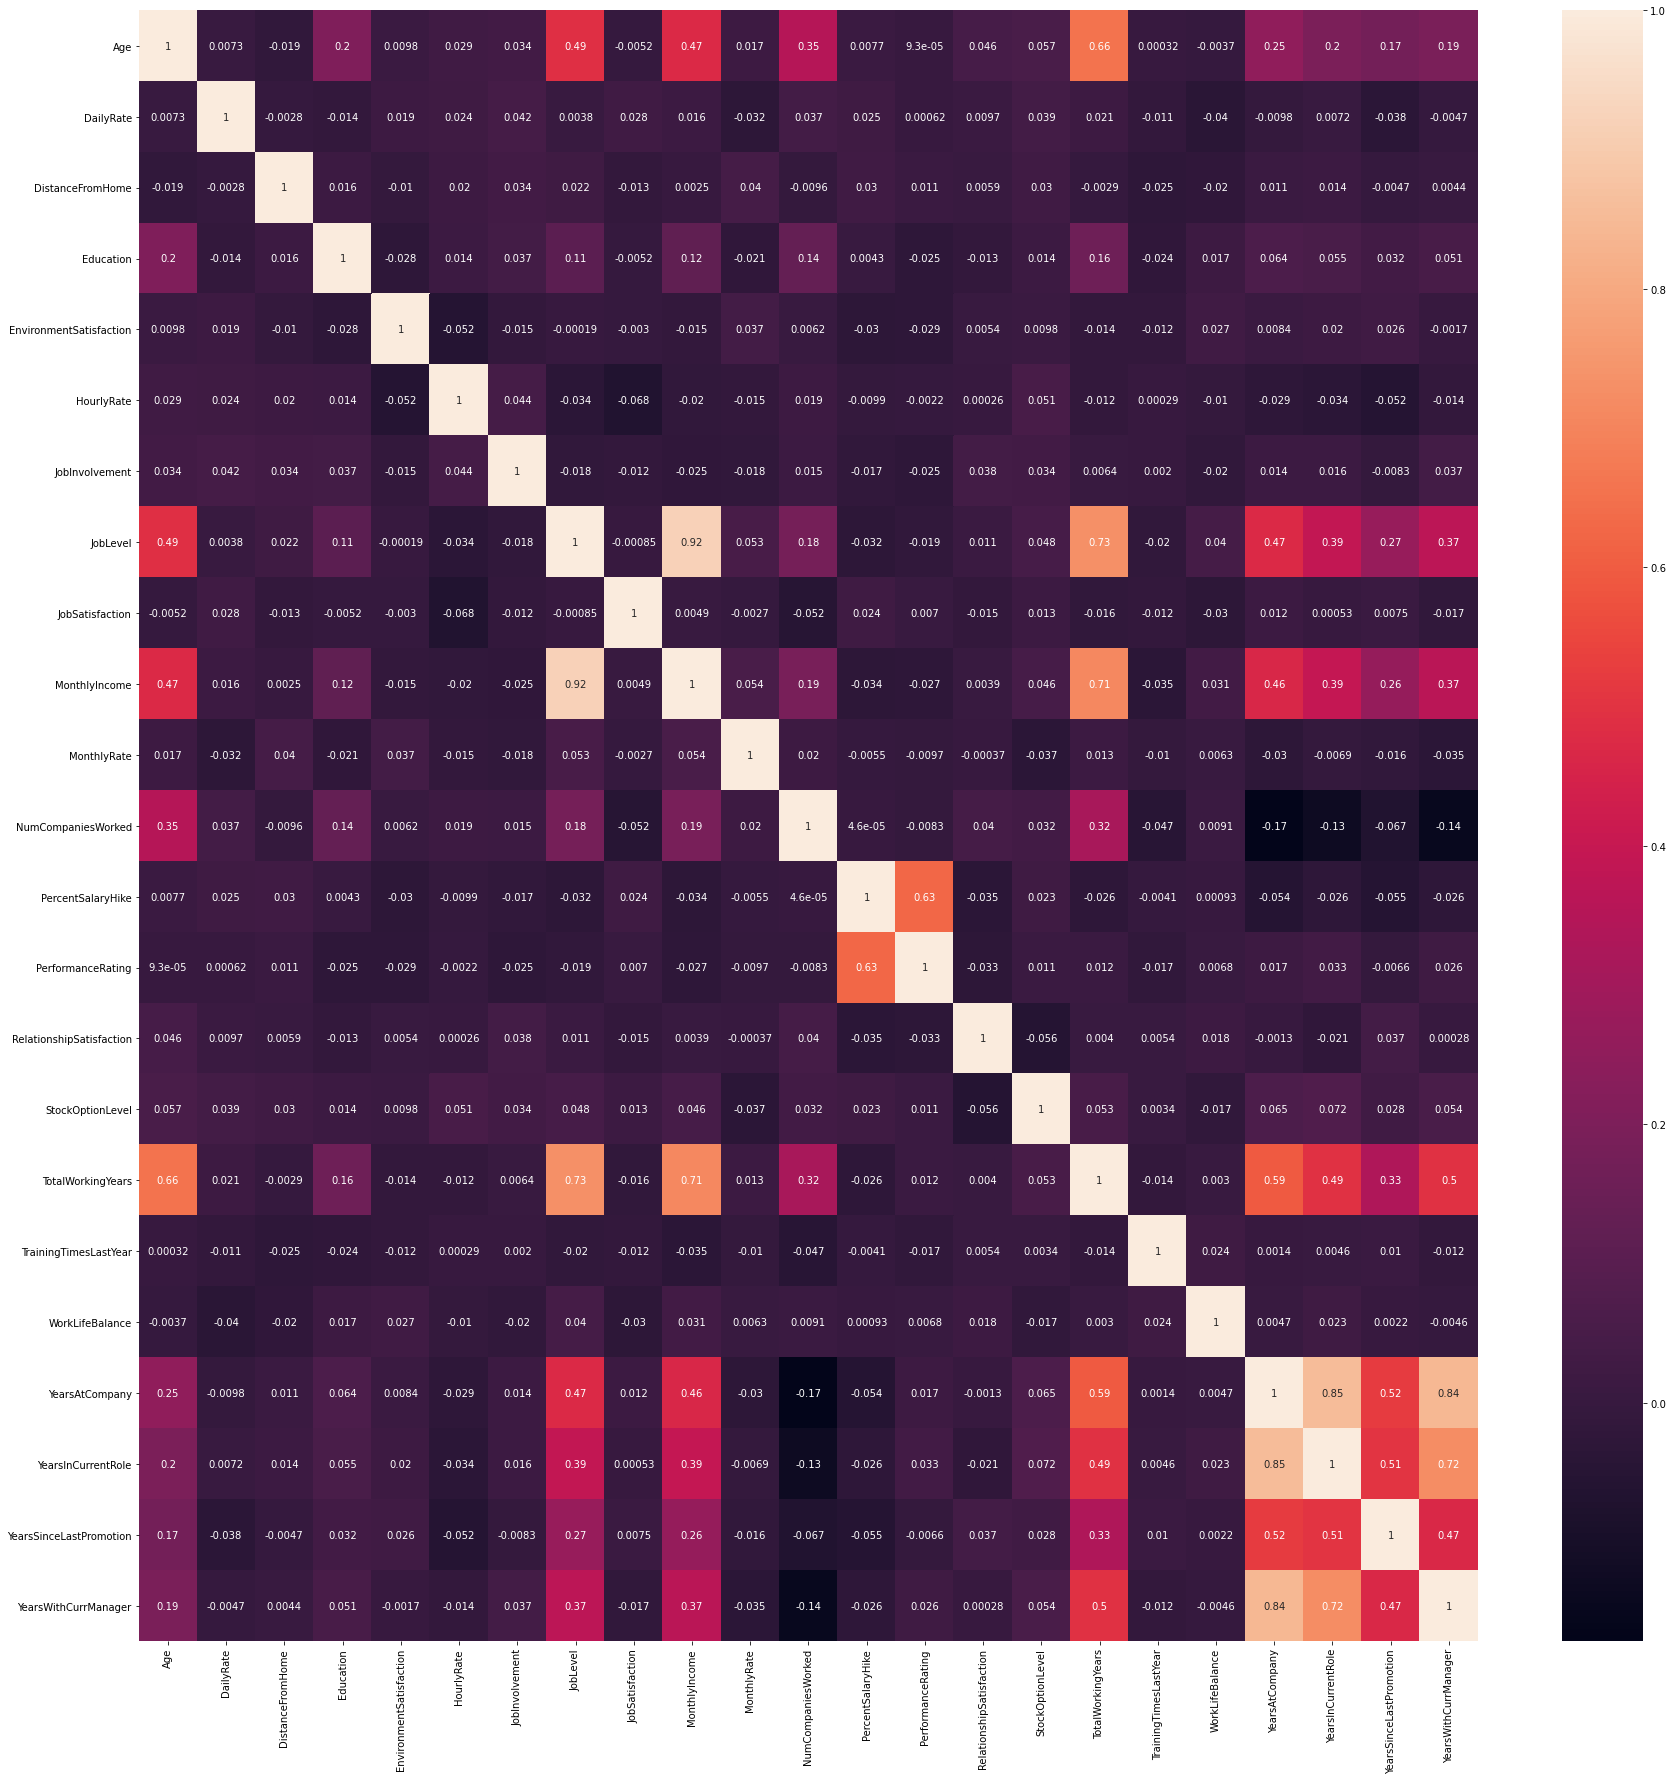

In [362]:
#### Ordinal variables association heatmap
fig = plt.figure(figsize=(30,30))
sns.heatmap(spearman_association_table,annot= True)

- YearsAtCompany and YearsWithCurrManager are highly correlated (84%).
- YearsAtCompany and YearsInCurrentRole are highly correlated (85%).

#### Now take a look at the nominal variables

In [364]:
from scipy import stats
def crammer_V(data,var1,var2):
    
    # calculate chi2
    contingency_table = pd.crosstab(index = data[var1],columns = data[var2])
    chi2,p,dof,_ = stats.chi2_contingency(contingency_table.values.tolist())  
    n = data.shape[0]
    R = contingency_table.shape[0]
    C = contingency_table.shape[1]
    
    #calculate Crammer's_V score
    V_score = round(np.sqrt(chi2 /(n * (min(C,R) - 1))),2)
    return V_score

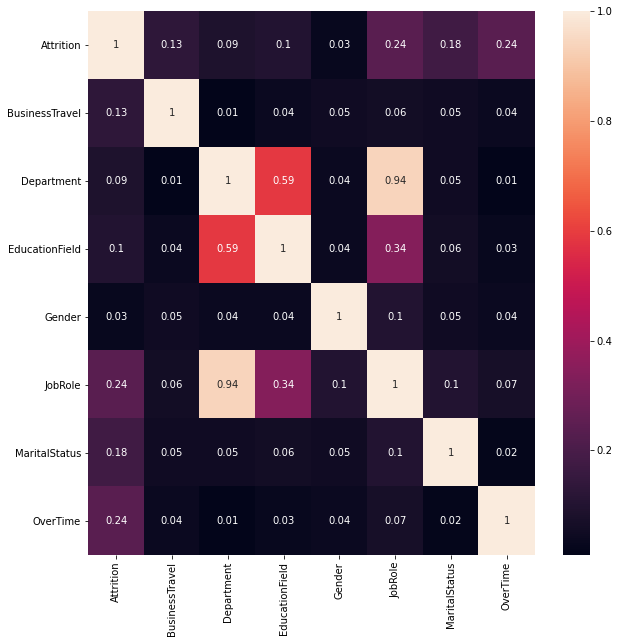

In [367]:
# Now we calculate all pairwise V_score and create one matrix for it
rows = []
for var1 in categorical_vars:
    cols = []
    for var2 in categorical_vars:
        v_score = crammer_V(data1,var1,var2)  # calculate v_score
        cols.append(v_score)
    rows.append(cols)
    
association_table = pd.DataFrame(np.array(rows), columns= categorical_vars, index= categorical_vars)
#### Categorical variables association heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(association_table,annot= True)

- Department and JobRole are highly associated.

#### Using correlation ratio to find the association between numeric and categorical variables

In [368]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

In [369]:
correlation_ratio(data1['OverTime'],data1['Age'])

0.0007874958851168791

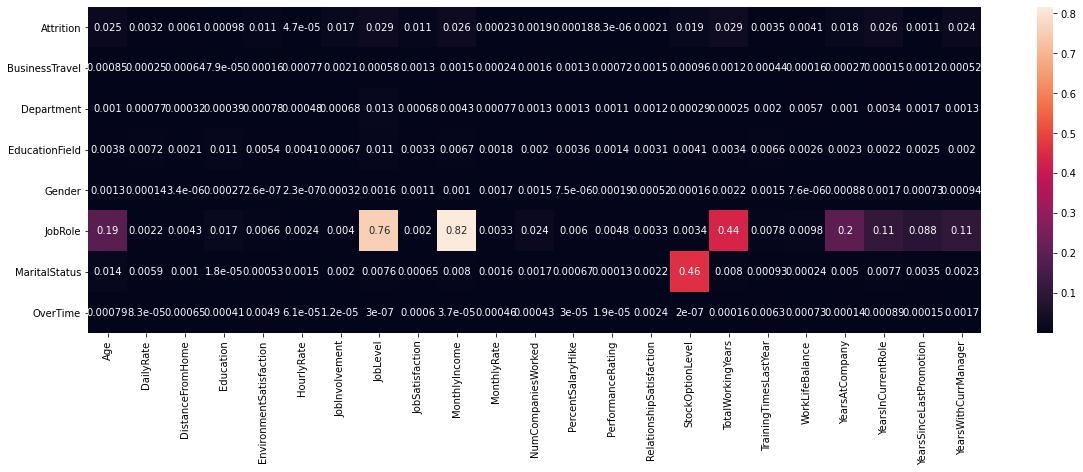

In [379]:
# Now we calculate all pairwise V_score and create one matrix for it
rows = []
for var1 in categorical_vars:
    cols = []
    for var2 in numeric_vars:
        v_score = correlation_ratio(data1[var1],data1[var2])  # calculate v_score
        cols.append(v_score)
    rows.append(cols)
    
association_table = pd.DataFrame(np.array(rows), columns= numeric_vars, index= categorical_vars)
#### Categorical variables association heatmap
fig = plt.figure(figsize=(20,6))
sns.heatmap(association_table,annot= True)

- MonthlyIncome and Jobrole are highly positively associated.

### Some more EDA

Q-1. What is the average monthly income by department? Are there any significant differences between individuals who quit and didn't quit?

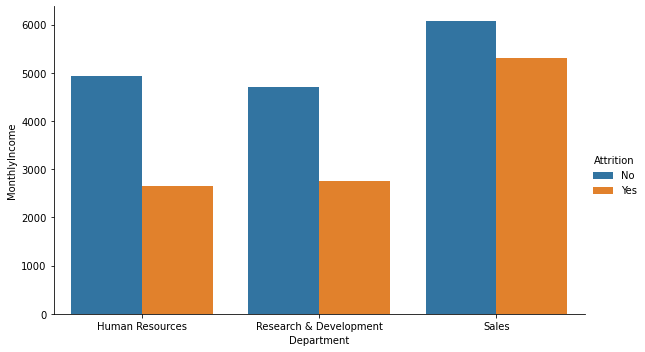

In [398]:
df = data1.groupby(['Attrition','Department']).median()['MonthlyIncome'].reset_index()
sns.factorplot(x = "Department", y = "MonthlyIncome",data = df, hue = "Attrition",kind = "bar",aspect=10/6)

> There is a huge difference in salary for HR and R&D people which is a reason for their attrition.But it looks like Sales people got quite high salary but still they are leaving most. Maybe other reason is there. Lets look w.r.t BusinessTravel

In [400]:
df = pd.DataFrame(data1.groupby(['Attrition','Department','BusinessTravel']).size(),columns = ['Count']).reset_index()
df

,Attrition,Department,BusinessTravel,Count
0,No,Human Resources,Non-Travel,6
1,No,Human Resources,Travel_Frequently,7
2,No,Human Resources,Travel_Rarely,38
3,No,Research & Development,Non-Travel,89
4,No,Research & Development,Travel_Frequently,145
5,No,Research & Development,Travel_Rarely,594
6,No,Sales,Non-Travel,43
7,No,Sales,Travel_Frequently,56
8,No,Sales,Travel_Rarely,255
9,Yes,Human Resources,Travel_Frequently,4


> It looks like Sales people are not quitting for their business travel. Maybe some other reason.

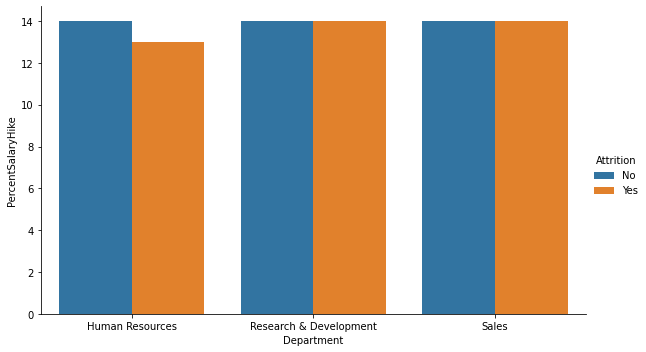

In [402]:
df = data1.groupby(['Attrition','Department']).median()['PercentSalaryHike'].reset_index()
sns.factorplot(x = "Department", y = "PercentSalaryHike",data = df, hue = "Attrition",kind = "bar",aspect=10/6)

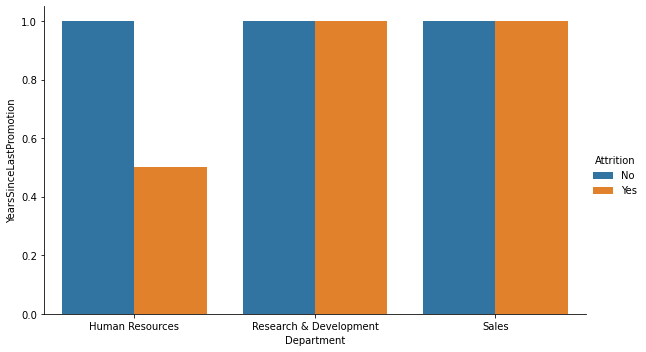

In [406]:
df = data1.groupby(['Attrition','Department']).median()['YearsSinceLastPromotion'].reset_index()
sns.factorplot(x = "Department", y = "YearsSinceLastPromotion",data = df, hue = "Attrition",kind = "bar",aspect=10/6)

> For HR people Last promotion also matters for attrition.

Q-2. What is the effect of overtime?

In [421]:
df = pd.DataFrame(data1.groupby(['Attrition','Department','OverTime']).size(),columns = ['Count']).reset_index()
df

,Attrition,Department,OverTime,Count
0,No,Human Resources,No,39
1,No,Human Resources,Yes,12
2,No,Research & Development,No,631
3,No,Research & Development,Yes,197
4,No,Sales,No,274
5,No,Sales,Yes,80
6,Yes,Human Resources,No,7
7,Yes,Human Resources,Yes,5
8,Yes,Research & Development,No,59
9,Yes,Research & Development,Yes,74


> So it looks like a huge percent of employees in every department left their jobs due to overtime.

Q3.  What's the average salary by job role?

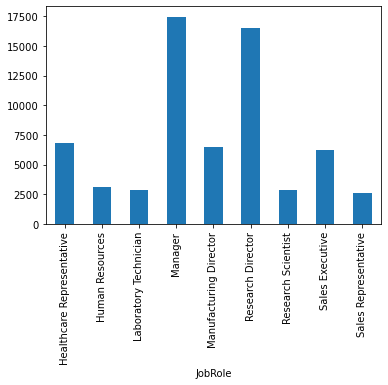

In [411]:
data1.groupby(['JobRole']).median()['MonthlyIncome'].plot(kind = 'bar')

Managers and Research Directors are getting huge salaries.

Q-4. What's the average working hours with current managers with respect to Jobrole?

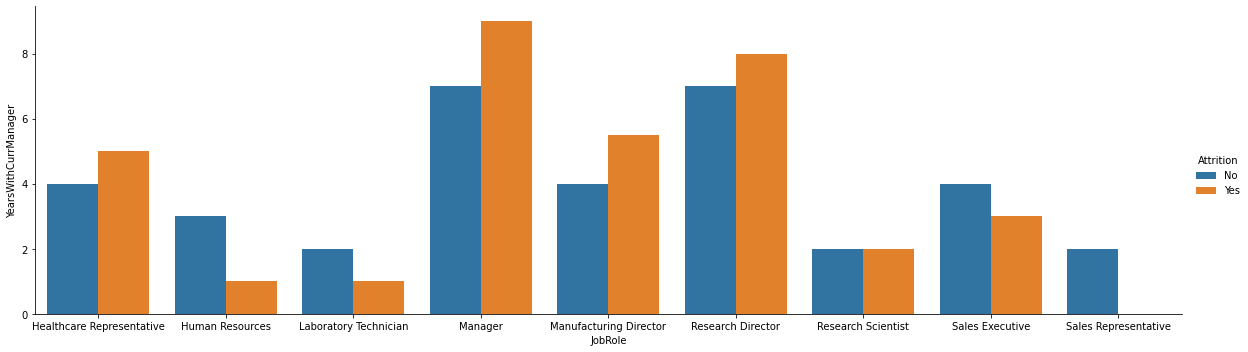

In [423]:
df = data1.groupby(['Attrition','JobRole']).median()['YearsWithCurrManager'].reset_index()
sns.factorplot(x = "JobRole", y = "YearsWithCurrManager",data = df, hue = "Attrition",kind = "bar",aspect=20/6)

Wow attrition rate is huge for HR,Manager,MDs, Research Directors after 4 years working with current manager.

Q -5. What is the JobRole wise average age distribution ?

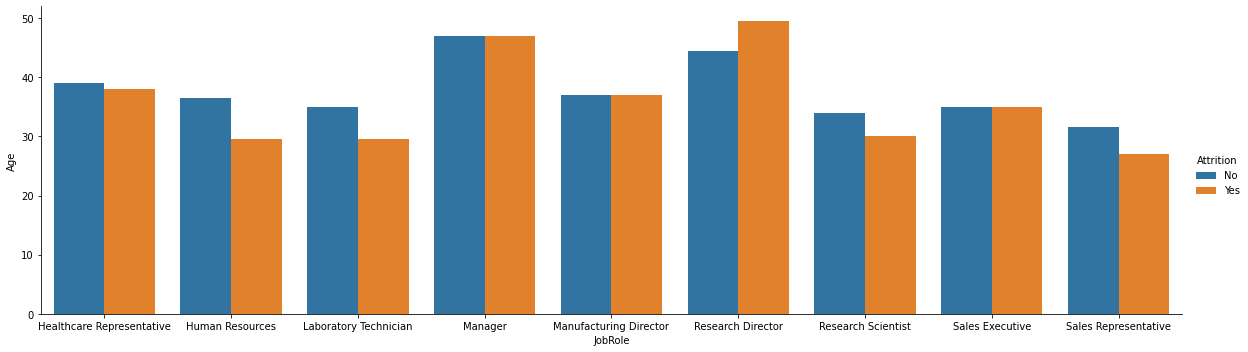

In [426]:
df = data1.groupby(['Attrition','JobRole']).median()['Age'].reset_index()
sns.factorplot(x = "JobRole", y = "Age",data = df, hue = "Attrition",kind = "bar",aspect=20/6)